In [ ]:
# Yahoo Financen asennus
!pip install -q yfinance

In [ ]:
# Importit
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# Tyylimäärittely seaborn-kirjastolle
sns.set_style("darkgrid")

# Käytettävät pörssikurssit - Osa 1
Valitaan ensimmäisen osion pörssikursseiksi NVIDIA ja Tesla. Määritetään alkamisajankohdaksi 1.1.2019.

In [ ]:
nvidia = yf.download("NVDA", start="2019-1-1")
tesla = yf.download("TSLA", start="2019-1-1")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Tarkastellaan datojen alku- ja loppuosia.

In [ ]:
nvidia

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,32.660000,34.619999,32.512501,34.055000,33.788895,50875200
2019-01-03,33.447498,33.790001,31.922501,31.997499,31.747471,70555200
2019-01-04,32.735001,34.432499,32.424999,34.047501,33.781452,58562000
2019-01-07,34.625000,36.222500,34.107498,35.849998,35.569866,70916000
2019-01-08,36.672501,36.695000,34.224998,34.957500,34.684345,78601600
...,...,...,...,...,...,...
2024-03-22,911.409973,947.780029,908.340027,942.890015,942.890015,58521500
2024-03-25,939.409973,967.659973,935.099976,950.020020,950.020020,55213600
2024-03-26,958.510010,963.750000,925.020020,925.609985,925.609985,51364800


In [ ]:
tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,20.406668,21.008667,19.920000,20.674667,20.674667,174879000
2019-01-03,20.466667,20.626667,19.825333,20.024000,20.024000,104478000
2019-01-04,20.400000,21.200001,20.181999,21.179333,21.179333,110911500
2019-01-07,21.448000,22.449333,21.183332,22.330667,22.330667,113268000
2019-01-08,22.797333,22.934000,21.801332,22.356667,22.356667,105127500
...,...,...,...,...,...,...
2024-03-22,166.690002,171.199997,166.300003,170.830002,170.830002,75454700
2024-03-25,168.759995,175.240005,168.729996,172.630005,172.630005,74228600
2024-03-26,178.580002,184.250000,177.380005,177.669998,177.669998,113186200


Esitetään seuraavaksi datat silmälle mieluisammassa muodossa.

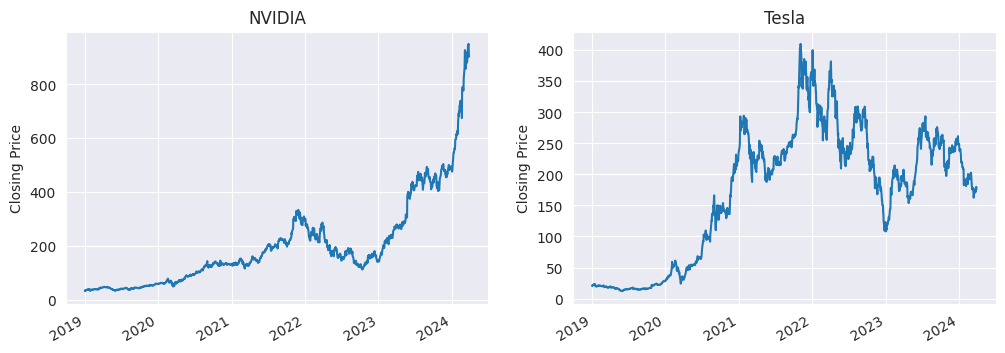

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

nvidia['Close'].plot(ax=axs[0])
axs[0].set_title("NVIDIA")
axs[0].set_xlabel("")
axs[0].set_ylabel("Closing Price")

tesla['Close'].plot(ax=axs[1])
axs[1].set_title("Tesla")
axs[1].set_xlabel("")
axs[1].set_ylabel("Closing Price")

plt.show()

Esityksistä käy ilmi, että NVIDIAN osakekurssi on vuodesta 2023 lähtien ollut varsin räjähdysmäisessä kasvussa, kun taas Teslan kurssi on heitellyt edestakaisin. Silmämääräisesti voi myös sanoa, että NVIDIAn kurssi on ollut kauttaaltaan annettuna aikavälinä "tasaisemman laatuinen". Nämä kaksi näennäisesti erilaista trendiä voisi olla mielenkiintoista käsitellä tekoälyn avulla, ja katsoa, mitä se ennustaa kursseille tapahtuvan tulevaisuudessa.

In [ ]:
# Tehdään tarvittavat asennukset tekoälyn käyttöä varten
!pip install -q pystan
!pip install -q prophet

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


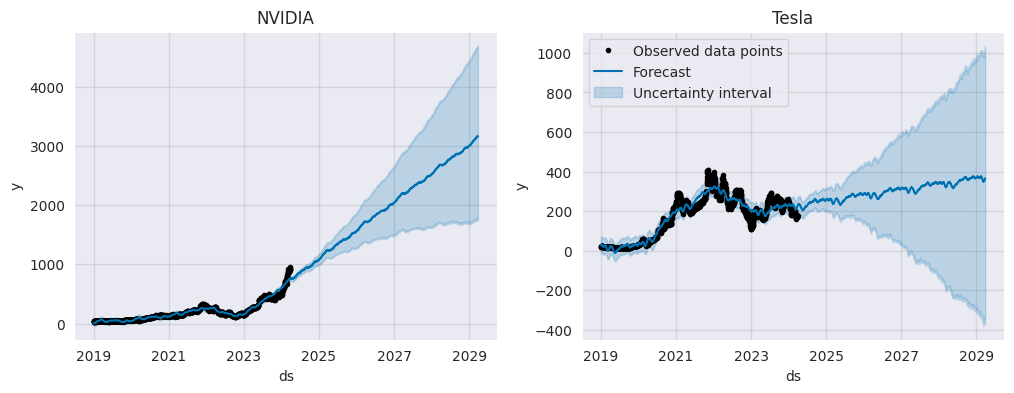

In [ ]:
from prophet import Prophet
import logging

# Poistetaan turhat logit
logging.getLogger("cmdstanpy").disabled = True

# Luodaan Prophet-oliosta instanssi sekä NVIDIALLE että Teslalle
# käyttäen sen oletusasetuksia (antamatta sille ylimääräisiä argumentteja)
model_n = Prophet()
model_t = Prophet()

# Mallille syötettävä data
data_n = nvidia.reset_index()[["Date", "Close"]]
data_n.columns = ["ds", "y"]
data_t = tesla.reset_index()[["Date", "Close"]]
data_t.columns = ["ds", "y"]

# Mallien sovitus
model_n.fit(data_n)
model_t.fit(data_t)

# Ennusteet viiden vuoden päähän
future_n = model_n.make_future_dataframe(periods=1825)
future_t = model_t.make_future_dataframe(periods=1825)
forecast_n = model_n.predict(future_n)
forecast_t = model_t.predict(future_t)

# Ennusteiden esitys
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
fig_n = model_n.plot(forecast_n, ax=axs[0])
axs[0].set_title("NVIDIA")
fig_t = model_t.plot(forecast_t, ax=axs[1])
axs[1].set_title("Tesla")
plt.legend(loc="upper left")
plt.show()

Huomionarvoista on se, että tekoälymalli kohtelee syötettyä dataa normaalina aikasarjana, eikä sille ole erikseen kerrottu kyseessä olevan osakekurssi. Tästä johtuen Teslan kohdalla epävarmuusväli painuu pakkasen puolelle. Mikäli epävarmuusväliä rajoitettaisiin ennusteita tehtäessä, tulokset saattaisivat kärsiä.

Mallin tuottamat ennusteet ovat kuitenkin mielestäni hyvin linjassa osakurssien aiempaan käyttäytymiseen pohjautuen. Tästä huolimatta uskon, että Teslan kurssi tulee nousemaan ennustettua rivakammin, kun taas en ihmettelisi, mikäli NVIDIAn kurssi ei jatkaisi nousukiitoaan.

## Datan aggregointia

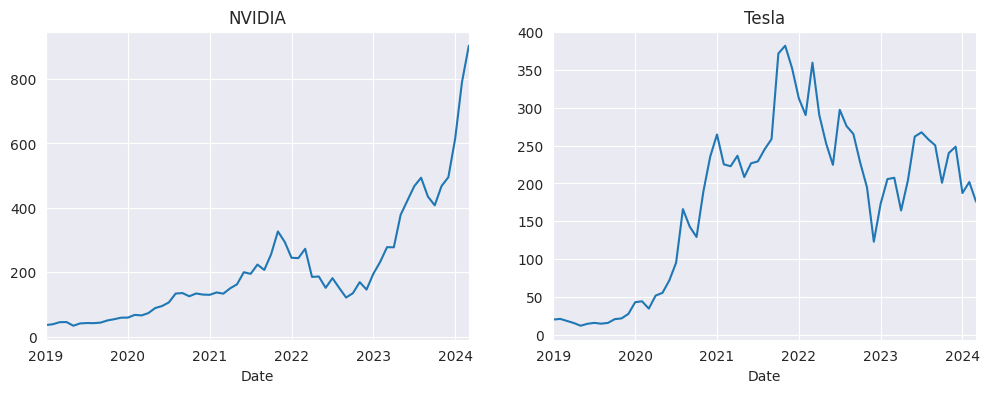

In [ ]:
# Tarkastellaan päätöshintoja kuukauden lopun tasolta
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
nvidia["Close"].resample("M").last().plot(ax=axs[0])
axs[0].set_title("NVIDIA")
tesla["Close"].resample("M").last().plot(ax=axs[1])
axs[1].set_title("Tesla")
plt.show()

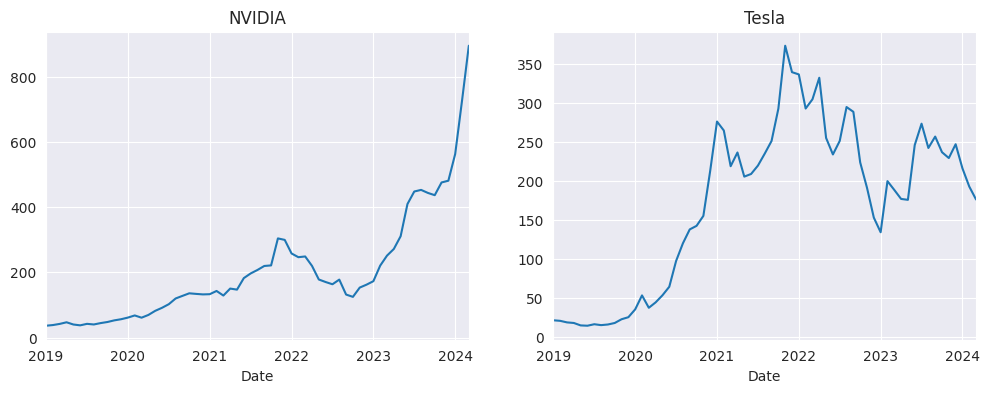

In [ ]:
# Kuukauden keskiarvon mukaan
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
nvidia["Close"].resample("M").mean().plot(ax=axs[0])
axs[0].set_title("NVIDIA")
tesla["Close"].resample("M").mean().plot(ax=axs[1])
axs[1].set_title("Tesla")
plt.show()

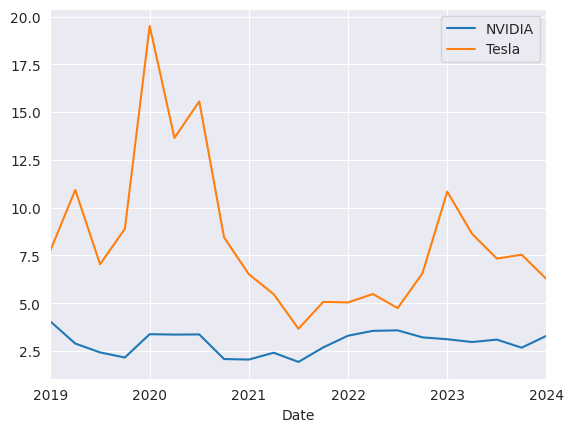

In [ ]:
# Vuosineljänneksittäiset vaihtomäärät (miljardia kpl)
(nvidia["Volume"] / 1000000000).resample("Q").sum().plot()
(tesla["Volume"] / 1000000000).resample("Q").sum().plot()
plt.legend(labels=["NVIDIA", "Tesla"])
plt.show()

## Liukuvat keskiarvot
Lasketaan kursseille liukuvat keskiarvot käyttäen sekä SMA- että EMA-keskiarvotyyppejä.

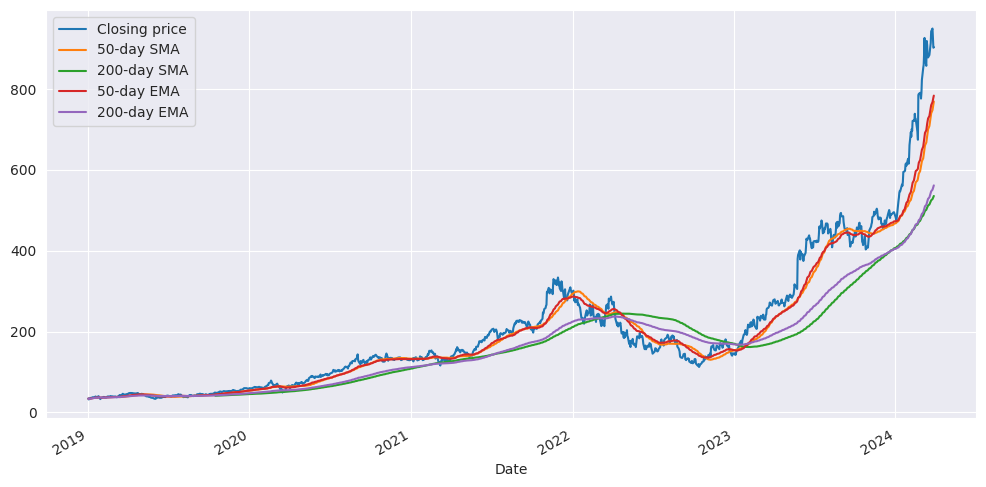

In [ ]:
# Todellinen hinta
nvidia["Close"].plot(figsize=(12, 6))

# 50 ja 200 päivän SMA
nvidia["Close"].rolling(50).mean().plot()
nvidia["Close"].rolling(200).mean().plot()

# EMA
nvidia["Close"].ewm(span=50).mean().plot()
nvidia["Close"].ewm(span=200).mean().plot()
plt.legend(["Closing price", "50-day SMA", "200-day SMA", "50-day EMA", "200-day EMA"])
plt.show()

Teslan kurssia käyttämällä pitäisi kaiken järjen mukaan tulla hieman eloisamman näköinen graafi, koska osakekurssi on kokenut huomattavaampaa heittelyä edestakaisin:

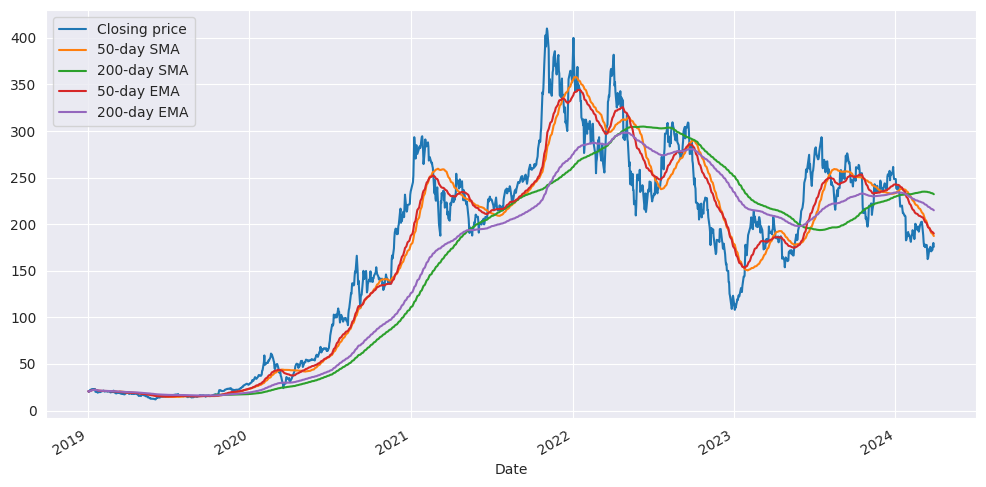

In [ ]:
# Todellinen hinta
tesla["Close"].plot(figsize=(12, 6))

# 50 ja 200 päivän SMA
tesla["Close"].rolling(50).mean().plot()
tesla["Close"].rolling(200).mean().plot()

# EMA
tesla["Close"].ewm(span=50).mean().plot()
tesla["Close"].ewm(span=200).mean().plot()
plt.legend(["Closing price", "50-day SMA", "200-day SMA", "50-day EMA", "200-day EMA"], loc="upper left")
plt.show()

Käy ilmi, että Teslan kohdalla toisiinsa liittyvät 50 ja 200 päivän viivat risteävät useammin: enemmän osto- ja myyntisignaaleita. Jos olisi varakas ja olisi noudattanut NVIDIAn kohdalla alkuvuoden 2023 ostosignaalia, olisi tällä hetkellä (31.3.2024) pullat melko hyvin uunissa.

## Muutosprosentit
Lisätään aineistoon sarake muutosprosentille sulkuajan hinnasta.

In [ ]:
nvidia["%-change N"] = nvidia["Close"].pct_change()
tesla["%-change T"] = tesla["Close"].pct_change()

nvidia

,Open,High,Low,Close,Adj Close,Volume,%-change N
Date,,,,,,,
2019-01-02,32.660000,34.619999,32.512501,34.055000,33.788895,50875200,NaN
2019-01-03,33.447498,33.790001,31.922501,31.997499,31.747471,70555200,-0.060417
2019-01-04,32.735001,34.432499,32.424999,34.047501,33.781452,58562000,0.064068
2019-01-07,34.625000,36.222500,34.107498,35.849998,35.569866,70916000,0.052941
2019-01-08,36.672501,36.695000,34.224998,34.957500,34.684345,78601600,-0.024895
...,...,...,...,...,...,...,...
2024-03-22,911.409973,947.780029,908.340027,942.890015,942.890015,58521500,0.031213
2024-03-25,939.409973,967.659973,935.099976,950.020020,950.020020,55213600,0.007562
2024-03-26,958.510010,963.750000,925.020020,925.609985,925.609985,51364800,-0.025694


In [ ]:
tesla

,Open,High,Low,Close,Adj Close,Volume,%-change T
Date,,,,,,,
2019-01-02,20.406668,21.008667,19.920000,20.674667,20.674667,174879000,NaN
2019-01-03,20.466667,20.626667,19.825333,20.024000,20.024000,104478000,-0.031472
2019-01-04,20.400000,21.200001,20.181999,21.179333,21.179333,110911500,0.057697
2019-01-07,21.448000,22.449333,21.183332,22.330667,22.330667,113268000,0.054361
2019-01-08,22.797333,22.934000,21.801332,22.356667,22.356667,105127500,0.001164
...,...,...,...,...,...,...,...
2024-03-22,166.690002,171.199997,166.300003,170.830002,170.830002,75454700,-0.011515
2024-03-25,168.759995,175.240005,168.729996,172.630005,172.630005,74228600,0.010537
2024-03-26,178.580002,184.250000,177.380005,177.669998,177.669998,113186200,0.029195


In [ ]:
# Luodaan uusi aineisto muutosprosenttien vertailua varten
changes = pd.concat([nvidia["%-change N"], tesla["%-change T"]], axis=1).fillna(0)
changes*100

,%-change N,%-change T
Date,,
2019-01-02,0.000000,0.000000
2019-01-03,-6.041700,-3.147171
2019-01-04,6.406754,5.769739
2019-01-07,5.294068,5.436124
2019-01-08,-2.489534,0.116428
...,...,...
2024-03-22,3.121347,-1.151490
2024-03-25,0.756186,1.053681
2024-03-26,-2.569423,2.919535


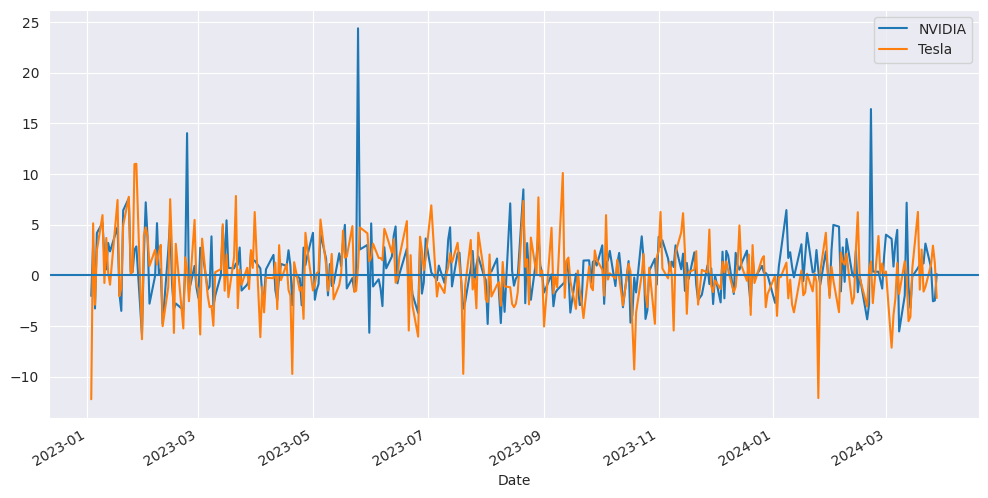

In [ ]:
# Kuvataan muutosprosentit vuodesta 2023 eteenpäin
(changes["2023":]*100).plot(figsize=(12, 6))
plt.axhline()
plt.legend(["NVIDIA", "Tesla"])
plt.show()

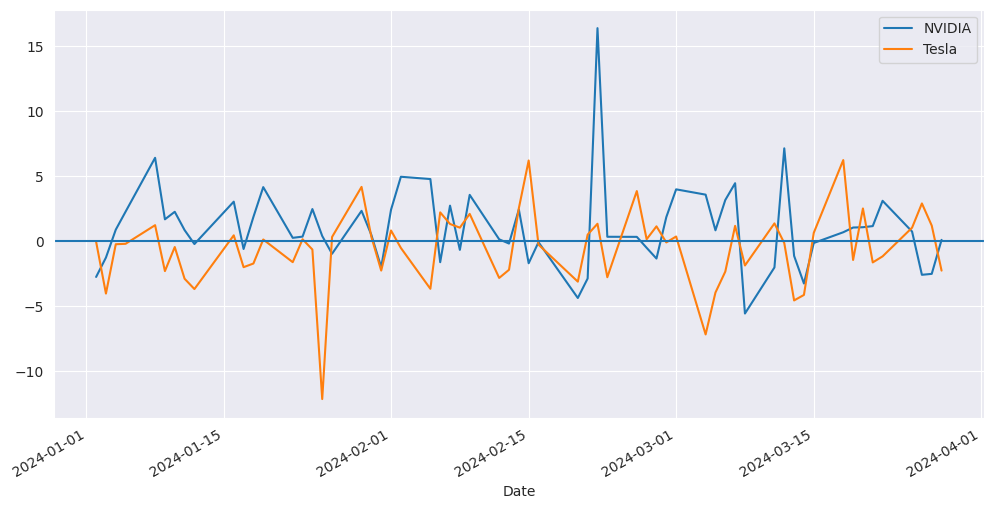

In [ ]:
# Vuoden 2024 muutosprosentit
(changes["2024":]*100).plot(figsize=(12, 6))
plt.axhline()
plt.legend(["NVIDIA", "Tesla"])
plt.show()

Vuoden 2024 kaaviosta käy ilmi, että NVIDIAn kurssin muutosprosentti on keikkunut nollan yläpuolella säännöllisemmin kuin Teslan.

Katsotaan seuraavaksi muutosprosentteihin liittyviä tunnuslukuja:

In [ ]:
(changes*100).describe().round(3)

,%-change N,%-change T
count,1319.000,1319.000
mean,0.302,0.244
std,3.261,4.031
min,-18.452,-21.063
25%,-1.500,-1.780
50%,0.321,0.198
75%,2.003,2.104
max,24.370,19.895


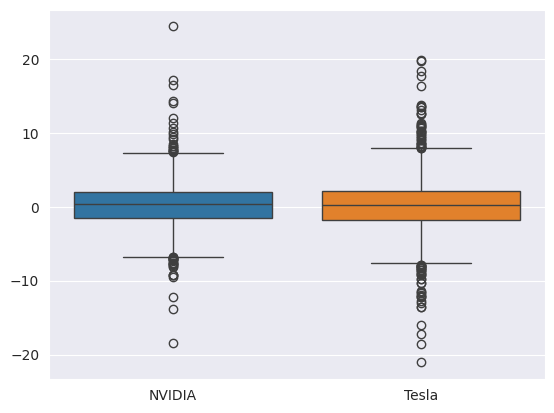

In [ ]:
# Graafisesti
sns.boxplot(data=(changes*100))
plt.xticks(ticks = [0, 1], labels = ["NVIDIA", "Tesla"])
plt.show()

Kaaviosta huomaa, että poikkeavia arvoja esiintyy huomattava määrä. Poikkeavat arvot ovat kuitenkin lähtökohtaisesti sijoittuneet melko lähelle toisiaan. Poimitaan ne päivämäärät, jolloin muutosprosentti on ollut yli 15 prosenttia:

In [ ]:
over_15 = changes[(abs(changes["%-change N"]) > 0.15) | (abs(changes["%-change T"]) > 0.15)]
over_15

,%-change N,%-change T
Date,,
2019-10-24,0.009073,0.176692
2020-02-03,0.016495,0.198949
2020-02-05,0.014689,-0.171758
2020-03-16,-0.184521,-0.185778
2020-03-18,-0.066507,-0.160344
2020-03-19,0.050044,0.183877
2020-03-24,0.171564,0.162817
2020-09-08,-0.056209,-0.210628
2021-03-09,0.079960,0.196412


In [ ]:
# Muutosprosenttien väliset korrelaatiot
changes.corr()

,%-change N,%-change T
%-change N,1.000000,0.483994
%-change T,0.483994,1.000000


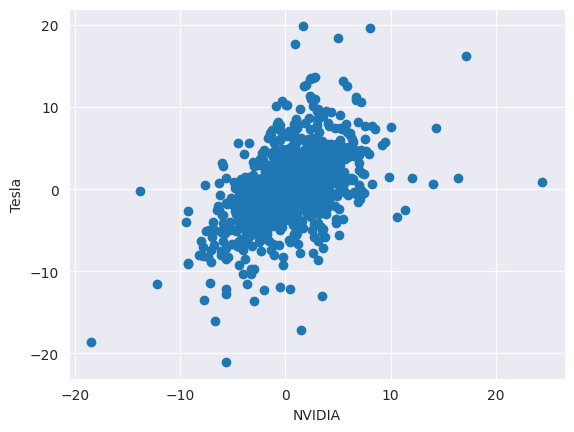

In [ ]:
# Muutosprosentit hajontakaaviona
plt.scatter((changes["%-change N"]) * 100, (changes["%-change T"]) * 100)
plt.xlabel("NVIDIA")
plt.ylabel("Tesla")
plt.show()

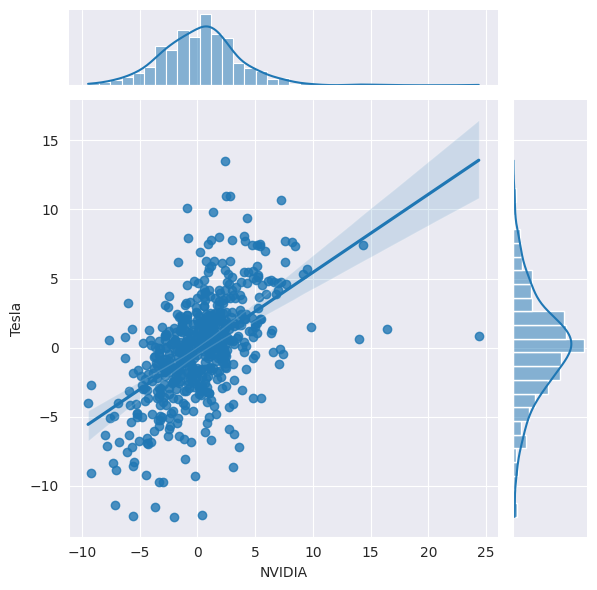

In [ ]:
# Vuodesta 2022 eteenpäin kuvattuna
sns.jointplot(data=(changes["2022":]*100), x="%-change N", y="%-change T", kind="reg")
plt.xlabel("NVIDIA")
plt.ylabel("Tesla")
plt.show()

Positiiviset korrelaatiot näkyvät kaavioissa nousevana pisteparvena, vaikkei korrelaatiokerroin olekaan valtava. Kuvataan seuraavaksi liukuva korrelaatio:

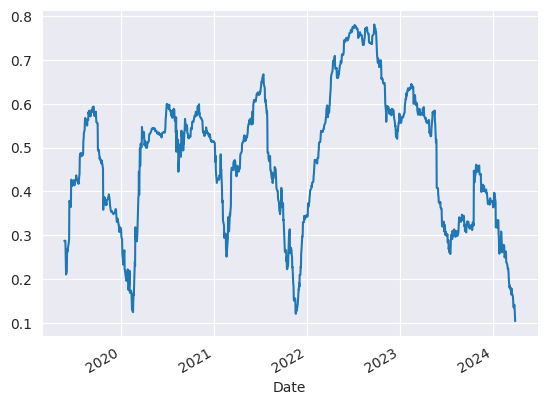

In [ ]:
changes["%-change N"].rolling(100).corr(changes["%-change T"]).plot()
plt.show()

## Volatiliteetti

<Axes: xlabel='Date'>

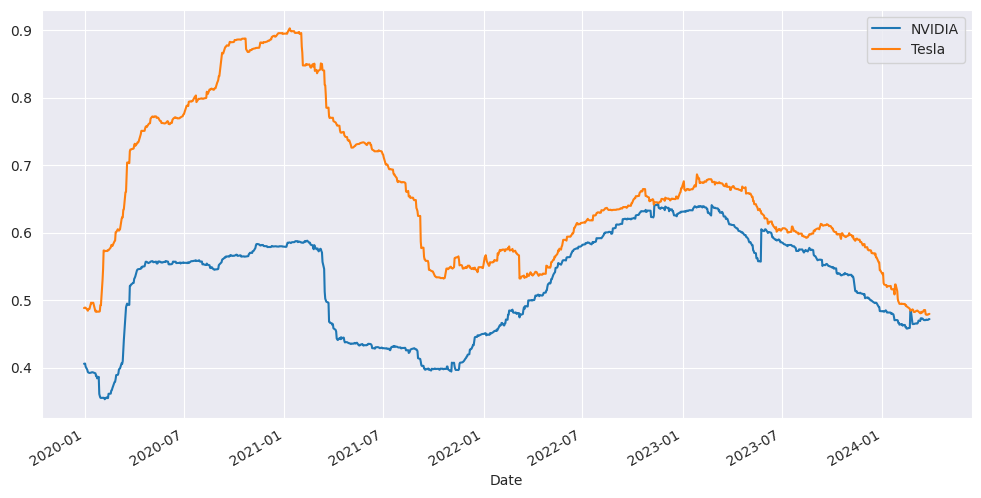

In [ ]:
(changes['%-change N'].rolling(252).std() * (252**0.5)).plot(label='NVIDIA', legend=True, figsize=(12, 6))
(changes['%-change T'].rolling(252).std() * (252**0.5)).plot(label='Tesla', legend=True, figsize=(12, 6))

Molempien osakkeiden volatiliteetti on kauttaaltaan varsin korkea, mutta silmiinpistävin on tuo ajanjakso, jolloin Tesla on pyörinyt 70 ja 90 prosentin välillä. Koronalla on varmastikin ollut jonkilainen vaikutus vuoden 2020 alun volatiliteettien ripeään kasvuun, kuten myös vuoden 2021 ripeähköön laskuun.

Testataan vielä lopuksi, onko viikonpäivällä ollut yhteyttä osakekurssin muutosprosenttiin:

In [ ]:
weekdays = ["mon", "tue", "wed", "thu", "fri"]

# Lisätään sarake viikonpäiville
changes["Weekday"] = changes.index.weekday

# Luodaan uusi aineisto tutkimista varten
df_n = (changes*100).groupby("Weekday")["%-change N"].describe()
df_n.index = weekdays
df_n

,count,mean,std,min,25%,50%,75%,max
mon,243.0,0.465435,3.470278,-18.452086,-1.155887,0.756186,2.352285,10.040585
tue,272.0,0.262729,3.039745,-9.472599,-1.348376,0.182655,1.816275,17.156420
wed,272.0,0.205979,2.905732,-7.788315,-1.619385,0.290552,1.986136,8.210241
thu,268.0,0.515279,3.846544,-12.236785,-1.358560,0.383397,2.102355,24.369632
fri,264.0,0.072156,2.970368,-9.227934,-1.723889,-0.048820,1.826775,11.340206


In [ ]:
# Tehdään sama Teslalle
df_t = (changes*100).groupby("Weekday")["%-change T"].describe()
df_t.index = weekdays
df_t

,count,mean,std,min,25%,50%,75%,max
mon,243.0,0.976324,4.826980,-18.577806,-1.575657,0.821153,3.345388,19.894859
tue,272.0,0.334707,4.044496,-21.062824,-1.460916,0.164165,2.077142,19.641208
wed,272.0,0.169494,3.668081,-17.175839,-1.933445,0.257335,2.268253,13.123639
thu,268.0,-0.095870,4.185014,-13.613708,-2.162878,0.153490,1.955015,18.387684
fri,264.0,-0.103631,3.276556,-12.971116,-1.853684,-0.118992,1.697203,11.000180


In [ ]:
# Maanantain ja perjantain välinen ero, NVIDIA
mon = changes["%-change N"][changes["Weekday"]==0]
fri = changes["%-change N"][changes["Weekday"]==4]

from scipy.stats import ttest_ind as t
t(mon, fri, equal_var=False, nan_policy="omit")

TtestResult(statistic=1.3652586750179292, pvalue=0.17281353758091422, df=478.29922444497754)

P-arvo suurempi kuin 0,05, ei siis tilastollista merkitsevyyttä.

In [ ]:
# Tiistain ja torstain välinen ero, NVIDIA
tue = changes["%-change N"][changes["Weekday"]==1]
thu = changes["%-change N"][changes["Weekday"]==3]

from scipy.stats import ttest_ind as t
t(tue, thu, equal_var=False, nan_policy="omit")

TtestResult(statistic=-0.8456965034783781, pvalue=0.3981207037230472, df=507.3968856780332)

Sama tarina kuin edellisessä.

In [ ]:
# Maanantain ja keskiviikon välinen ero, Tesla
mon = changes["%-change T"][changes["Weekday"]==0]
wed = changes["%-change T"][changes["Weekday"]==2]

from scipy.stats import ttest_ind as t
t(mon, wed, equal_var=False, nan_policy="omit")

TtestResult(statistic=2.116289141593207, pvalue=0.034869516341159014, df=449.3148050071361)

P-arvo pienempi kuin 0,05, tilastollinen merkitsevyys läsnä.

In [ ]:
# Tiistain ja perjantain välinen ero, Tesla
tue = changes["%-change T"][changes["Weekday"]==1]
fri = changes["%-change T"][changes["Weekday"]==4]

from scipy.stats import ttest_ind as t
t(tue, fri, equal_var=False, nan_policy="omit")

TtestResult(statistic=1.3805976036010967, pvalue=0.16799864060696146, df=517.5613698980322)

P-arvo suurempi kuin 0,05, ei tilastollista merkitsevyyttä.

# Osa 2 - beer.csv

In [ ]:
# Yhdistetään Driveen, josta aineisto löytyy
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive/MyDrive/data

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/data


In [ ]:
df = pd.read_csv("beer.csv")
df.index = pd.to_datetime(df["Month"],format="%Y-%m")
df.index = df.index.strftime("%Y-%m")
df = df.drop("Month", axis=1)

df

,Monthly beer production
Month,
1956-01,93.2
1956-02,96.0
1956-03,95.2
1956-04,77.1
1956-05,70.9
...,...
1995-04,127.0
1995-05,151.0
1995-06,130.0


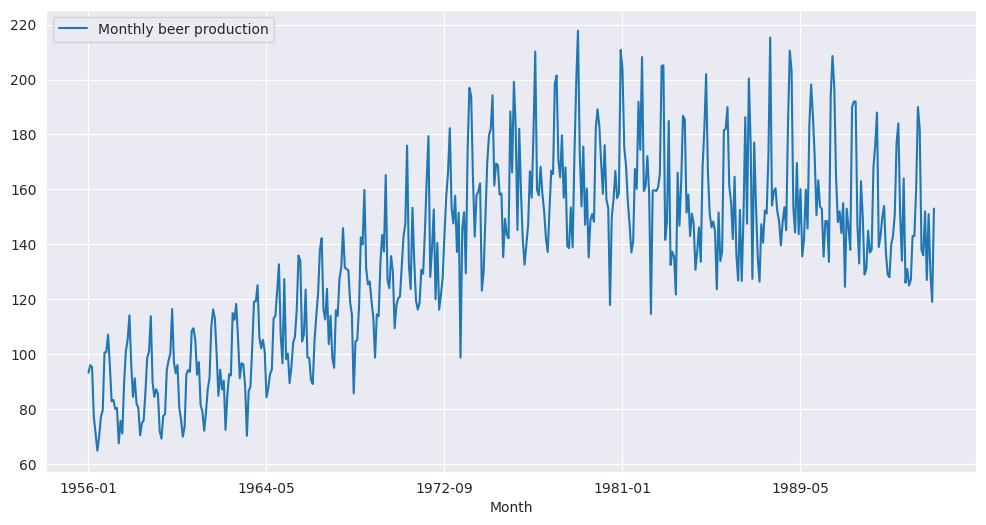

In [ ]:
df.plot(figsize=(12, 6))
plt.show()

Laaditaan seuraavaksi 20 vuoden ennuste käyttämällä notebookissa aiemmin käytettyä Prophet-tekoälyä, mutta annetaan sille tällä kertaa myös joitakin aiheellisia parametreja.

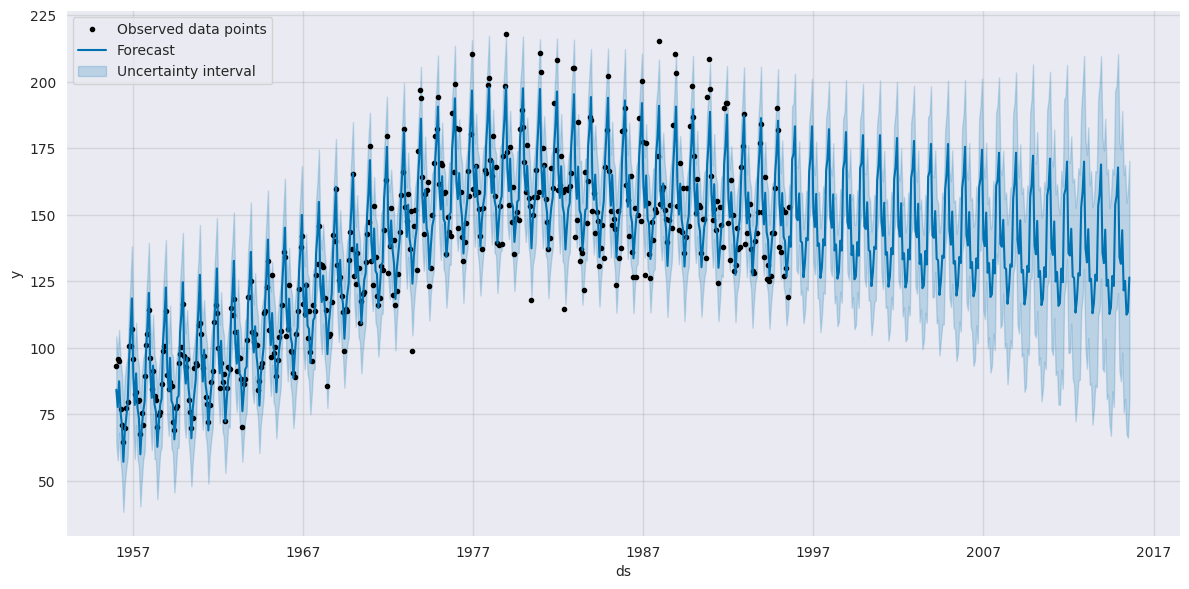

In [ ]:
# Luodaan Prophet-oliosta instanssi
model = Prophet(seasonality_mode="additive",
                yearly_seasonality=True,
                weekly_seasonality=False,
                daily_seasonality=False,
                seasonality_prior_scale=10,
                interval_width=0.95)

# Mallille syötettävä data
data = df.reset_index()[["Month", "Monthly beer production"]]
data.columns = ["ds", "y"]

# Mallin sovitus
model.fit(data)

# Ennusteet 20 vuoden päähän
future = model.make_future_dataframe(periods=240, freq="M")
forecast = model.predict(future)

# Ennusteen esitys
fig = model.plot(forecast, figsize=(12, 6))
plt.legend(loc="upper left")
plt.show()

Kokeillaan seuraavaksi samaa ilman ylimääräisiä parametreja.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


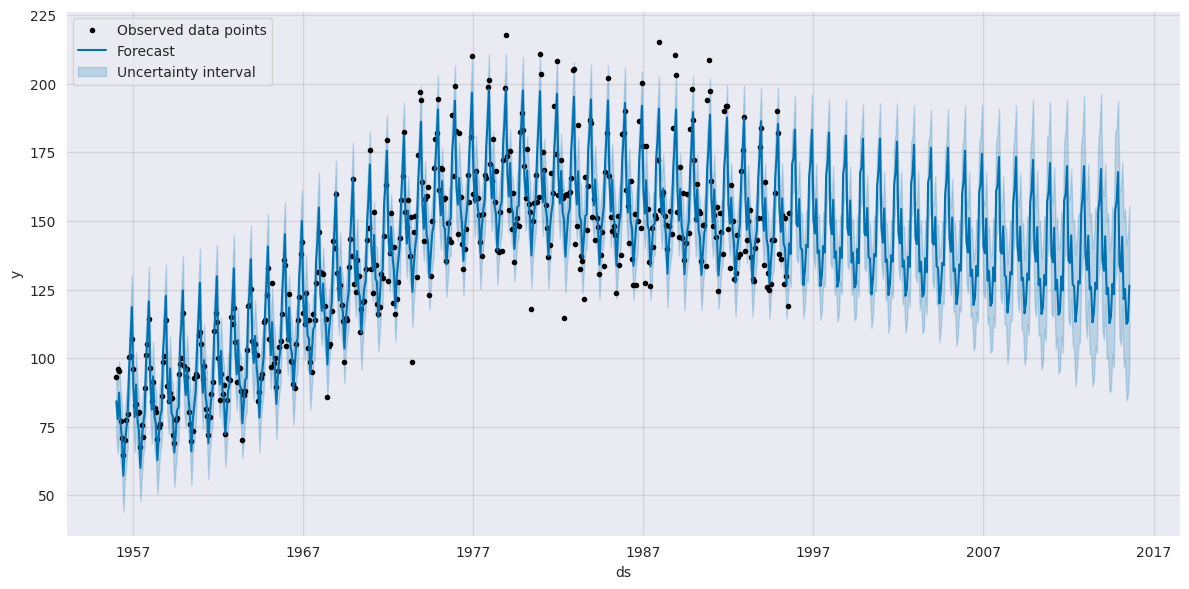

In [ ]:
# Luodaan Prophet-oliosta instanssi
model = Prophet()

# Mallille syötettävä data
data = df.reset_index()[["Month", "Monthly beer production"]]
data.columns = ["ds", "y"]

# Mallin sovitus
model.fit(data)

# Ennusteet 20 vuoden päähän
future = model.make_future_dataframe(periods=240, freq="M")
forecast = model.predict(future)

# Ennusteen esitys
fig = model.plot(forecast, figsize=(12, 6))
plt.legend(loc="upper left")
plt.show()

Selkeimmän eron kahden kuvaajan välillä huomaa epävarmuusvälin leveydestä. Tutustutaan aikasarjan komponentteihin seuraavaksi:

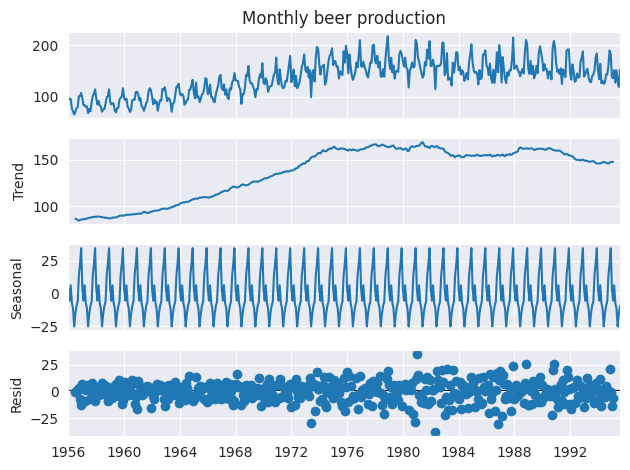

In [ ]:
from statsmodels.tsa.api import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing

# Indeksin tarpeellinen muutos
df.index = pd.to_datetime(df.index)

seasonal_decompose(df["Monthly beer production"]).plot()
plt.show()

## Mallin sovittaminen
Käytetään kolminkertaista eksponentiaalista tasoitusta, koska aikasarjassa on sekä trendi, että kausivaihtelu.

In [ ]:
model3 = ExponentialSmoothing(df["Monthly beer production"],
                              trend="add",
                              seasonal="mul",
                              seasonal_periods=12,
                              freq="MS").fit()

df["Forecast"] = model3.fittedvalues
df

,Monthly beer production,Forecast
Month,,
1956-01-01,93.2,88.024488
1956-02-01,96.0,83.084688
1956-03-01,95.2,91.956006
1956-04-01,77.1,83.620554
1956-05-01,70.9,81.134365
...,...,...
1995-04-01,127.0,135.855629
1995-05-01,151.0,131.396371
1995-06-01,130.0,118.905896


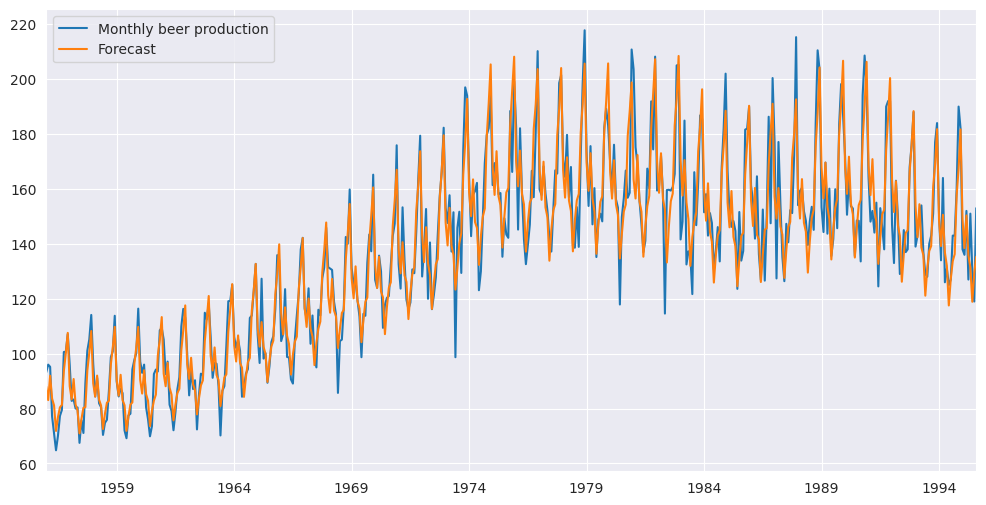

In [ ]:
df.plot(figsize=(12, 6))
plt.xlabel("")
plt.show()

Ennusteet ovat varsin hyvin linjassa toteutuneiden tuotantomäärien kanssa. Lisätään vielä ennustevirheet aineistoon:

In [ ]:
df["Residual"] = model3.resid
df

,Monthly beer production,Forecast,Residual
Month,,,
1956-01-01,93.2,88.024488,5.175512
1956-02-01,96.0,83.084688,12.915312
1956-03-01,95.2,91.956006,3.243994
1956-04-01,77.1,83.620554,-6.520554
1956-05-01,70.9,81.134365,-10.234365
...,...,...,...
1995-04-01,127.0,135.855629,-8.855629
1995-05-01,151.0,131.396371,19.603629
1995-06-01,130.0,118.905896,11.094104


Kuvataan ennustevirheet omana graafinaan ja verrataan ennusteita toteutuneista tuotantomääristä pistekaavion avulla:

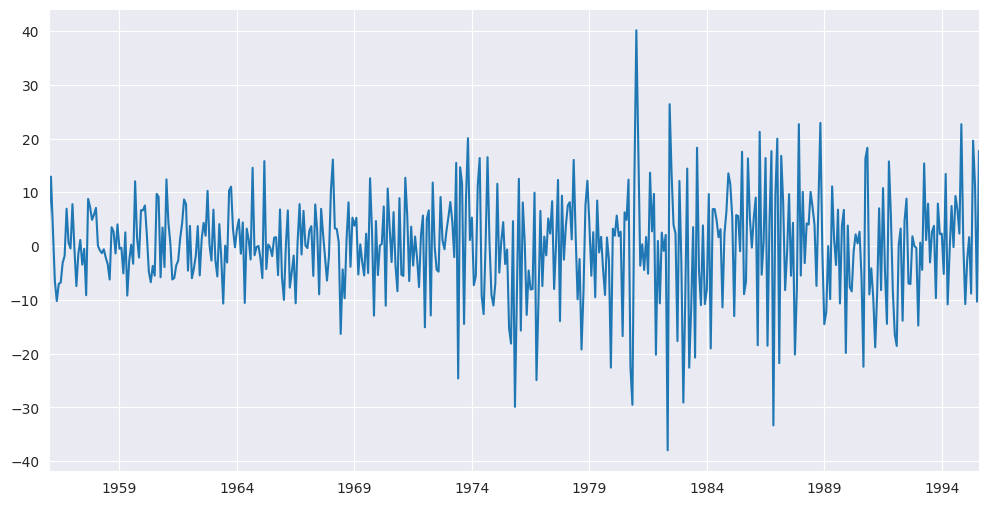

In [ ]:
df["Residual"].plot(figsize=(12, 6))
plt.xlabel("")
plt.show()

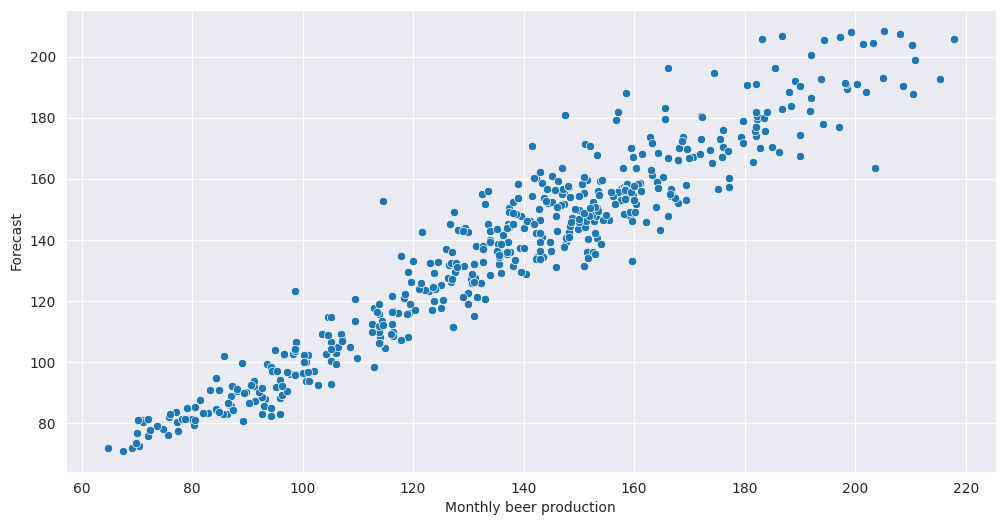

In [ ]:
# Pistekaaviona
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="Monthly beer production", y="Forecast")
plt.show()

Ennustevirheiden vaihtelu näyttää varsin sattumanvaraiselta. Pistekaavio sen sijaan osoittaa, että mallin ennustamiskyky on varsin kelvollinen (täydelliset ennusteet olisivat muotoa x=y).

Laaditaan lopuksi vielä muutama ennuste:

In [ ]:
# Katsotaan aineiston loppua
df.tail()

,Monthly beer production,Forecast,Residual
Month,,,
1995-04-01,127.0,135.855629,-8.855629
1995-05-01,151.0,131.396371,19.603629
1995-06-01,130.0,118.905896,11.094104
1995-07-01,119.0,129.351617,-10.351617
1995-08-01,153.0,135.314539,17.685461


In [ ]:
# Lasketaan aluksi seuraavan vuoden ennusteet
timestamps = pd.date_range("1995-09-01", periods=12, freq="MS")
forecasts = model3.forecast(12)

df_forecasts = pd.DataFrame(data=forecasts,
                            index=timestamps,
                            columns=["Forecast"])
df_forecasts

,Forecast
1995-09-01,138.973267
1995-10-01,160.511856
1995-11-01,170.498397
1995-12-01,183.150411
1996-01-01,150.145478
1996-02-01,140.829869
1996-03-01,153.424478
1996-04-01,138.731226
1996-05-01,135.253365
1996-06-01,120.954098


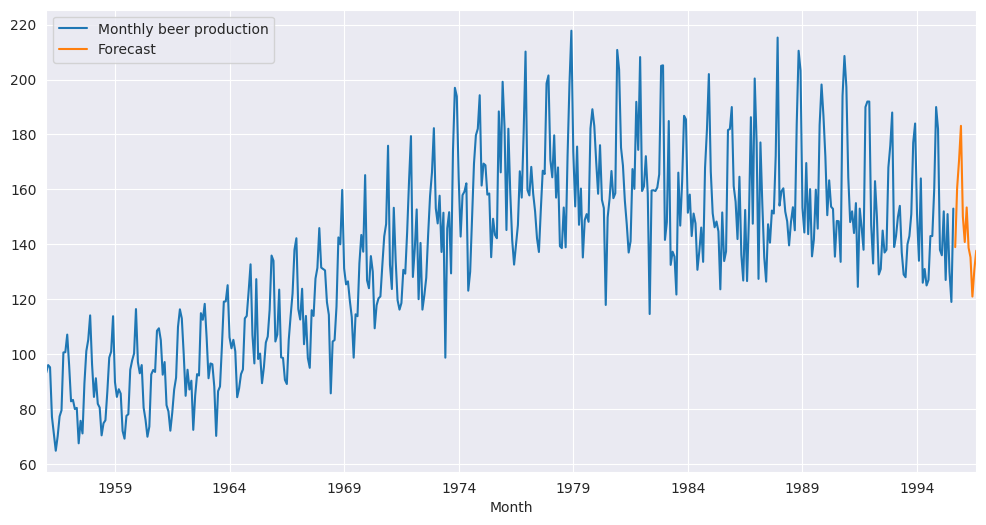

In [ ]:
plt.figure(figsize=(12, 6))
df["Monthly beer production"].plot()
df_forecasts["Forecast"].plot()
plt.legend(loc="upper left")
plt.show()

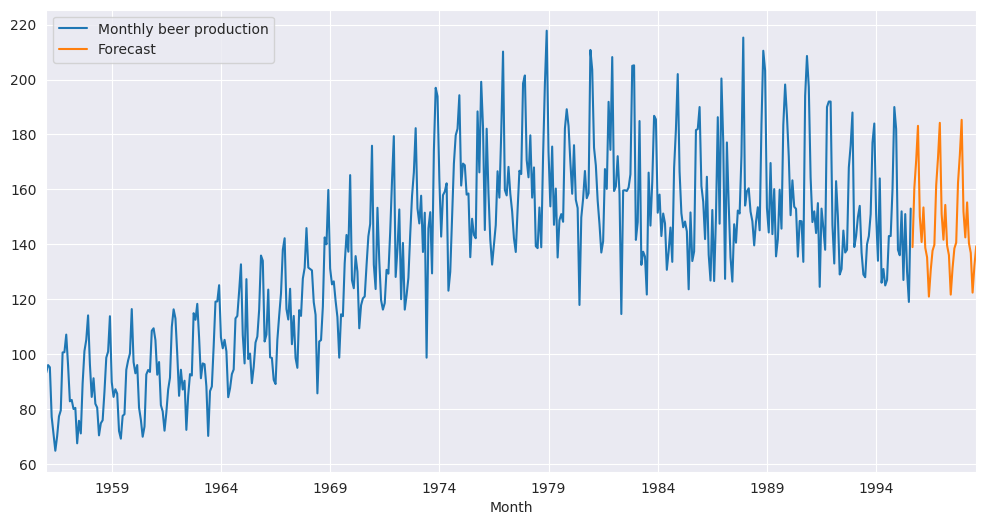

In [ ]:
# Lasketaan seuraavaksi kolmen seuraavan vuoden ennusteet
timestamps = pd.date_range("1995-09-01", periods=36, freq="MS")
forecasts = model3.forecast(36)

df_forecasts = pd.DataFrame(data=forecasts,
                            index=timestamps,
                            columns=["Forecast"])

plt.figure(figsize=(12, 6))
df["Monthly beer production"].plot()
df_forecasts["Forecast"].plot()
plt.legend(loc="upper left")
plt.show()

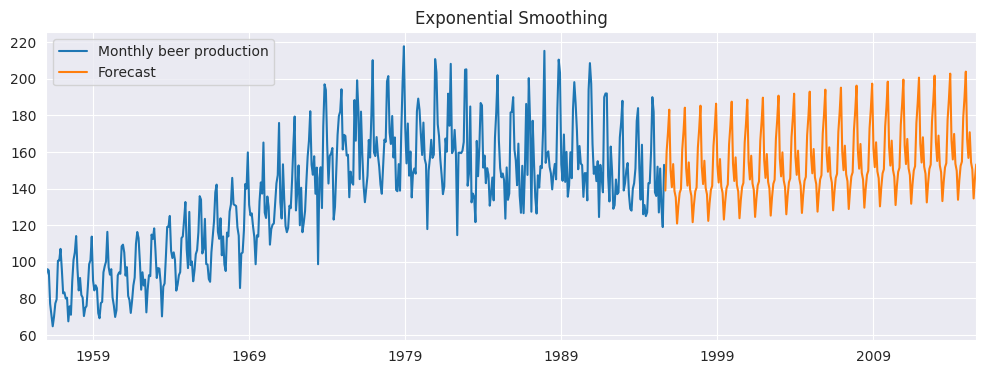

<Figure size 640x480 with 0 Axes>

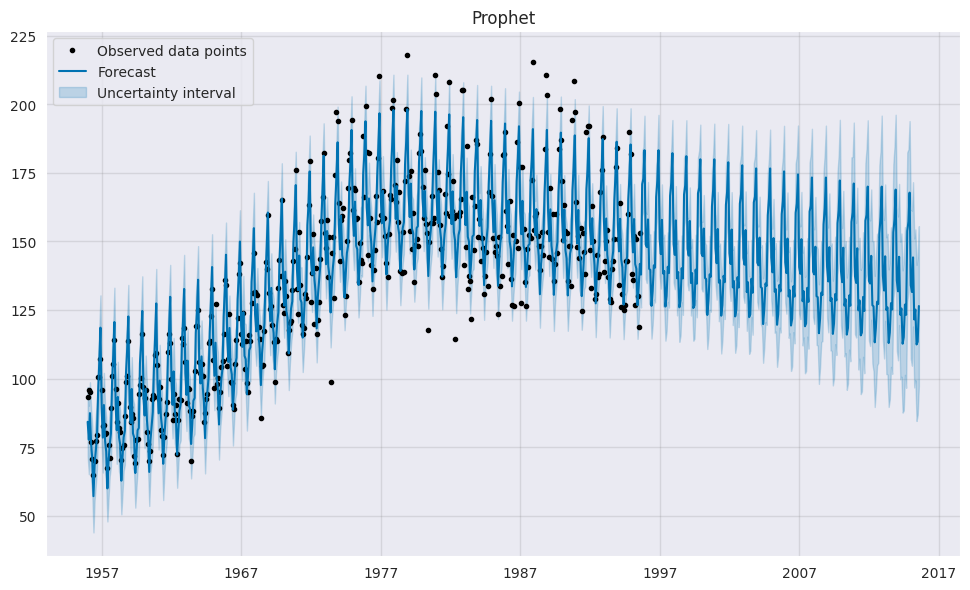

In [ ]:
# Lopuksi 20 vuoden ennuste, kuten aiemmin Prophetilla
timestamps = pd.date_range("1995-09-01", periods=240, freq="MS")
forecasts = model3.forecast(240)

df_forecasts = pd.DataFrame(data=forecasts,
                            index=timestamps,
                            columns=["Forecast"])

# Tasoituksen esitys
plt.figure(figsize=(12, 4))
df["Monthly beer production"].plot()
df_forecasts["Forecast"].plot()
plt.xlabel("")
plt.ylabel("")
plt.title("Exponential Smoothing")
plt.legend(loc="upper left")
plt.show()

# Prophetin esitys vertailun vuoksi
plt.figure()
fig = model.plot(forecast)
plt.xlabel("")
plt.ylabel("")
plt.title("Prophet")
plt.legend(loc="upper left")
plt.show()

Ennusteiden trendeissä on selkeä ero. Eksponentiaalisen tasoituksen ennusteen ylemmät arvot osuvat lähtökohtaisesti Prophetin epävarmuusvälin ylätasolle. Kausivaihteluiden ennusteissa on olettaenkin selkeä logiikka.